In [1]:
#############################################################################
####################Import all packages######################################
#############################################################################
import os
import random
import numpy as np
#import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import pandas_profiling as pp
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'
# Set working directory
#############################################################################
# Make Jupyter Notebook show ALL output of a cell, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#  READING IN DATA
pre_and_flight = pd.read_csv('~/Documents/greta_forarex/new_data/final_data_USE_THIS_ONE/pre_and_flight_plot_table.csv')
#postflight = pd.read_ickle('pre_and_flight_plot_table.csv')



In [5]:
pre_and_flight.timeStamp = pd.to_datetime(pre_and_flight.timeStamp)

In [6]:
#re_and_flight['timeStamp'] = pre_and_flight.timeStamp.dt.tz_localize(None)

In [7]:
pre_and_flight.Pressure_LateAccess = pre_and_flight.Pressure_LateAccess / 10
pre_and_flight.Exp0_PhValue = pre_and_flight.Exp0_PhValue / 1000

In [8]:
# Sort DF by timeStamp
pre_and_flight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
pre_and_flight.reset_index(inplace=True)
pre_and_flight.timeStamp

0     2019-03-11 07:45:58
1     2019-03-11 07:46:03
2     2019-03-11 07:46:08
3     2019-03-11 07:46:14
4     2019-03-11 07:46:19
5     2019-03-11 07:46:25
6     2019-03-11 07:46:30
7     2019-03-11 07:46:36
8     2019-03-11 07:46:41
9     2019-03-11 07:46:46
10    2019-03-11 07:46:52
11    2019-03-11 07:46:58
12    2019-03-11 07:47:03
13    2019-03-11 07:47:08
14    2019-03-11 07:47:14
15    2019-03-11 07:47:20
16    2019-03-11 07:47:25
17    2019-03-11 07:47:30
18    2019-03-11 07:47:35
19    2019-03-11 07:47:40
20    2019-03-11 07:47:46
21    2019-03-11 07:47:51
22    2019-03-11 07:47:58
23    2019-03-11 07:48:04
24    2019-03-11 07:48:09
25    2019-03-11 07:48:15
26    2019-03-11 07:48:20
27    2019-03-11 07:48:27
28    2019-03-11 07:48:32
29    2019-03-11 07:48:38
30    2019-03-11 07:48:43
31    2019-03-11 07:48:48
32    2019-03-11 07:48:53
33    2019-03-11 07:48:58
34    2019-03-11 07:49:04
35    2019-03-11 07:49:09
36    2019-03-11 07:49:14
37    2019-03-11 07:49:19
38    2019-0

In [9]:
pre_and_flight.timeStamp.min()
pre_and_flight.timeStamp.max()

Timestamp('2019-03-11 07:45:58')

Timestamp('2019-03-11 10:38:48')

In [10]:
#Wichtige Zeitpunkte:
#- Ende Late Access (LA) 11.03.2019  07:45:58
end_late_access = pd.to_datetime('2019-03-11 07:45:58') 
# Just a convenient cut off point to remove end_late_access later in plots
flight_start = pd.to_datetime('2019-03-11 10:01') 
#- Lift-Off (LO) 11.03.2019  10:19:56  --- 11.03.2019 10:20:00 1552296000 Lift-Off (LO)
lift_off = pd.to_datetime('2019-03-11 10:20:00') 
#- Ende des Raketenantriebs (Motorabwurf, keine Beschleunigung, keine Hypergravitation) 1 min 10 s 20 ms nach LO
end_rocket_propulsion = lift_off + pd.Timedelta('26 seconds')
#- De-Spin (keine Rotierung der Rakete) ~ Nullbewegung in alle Richtungen im Video nach 1 min 7s 38 ms nach LO
de_spin = lift_off + pd.Timedelta('1 minutes 7 seconds')
# Motor ejection
ejection_of_motor = lift_off + pd.Timedelta('1 minutes 10 seconds')
#- Apogee (Zeitpunkt zu dem die Rakete den höchsten Höhenmeter erreicht hat) 124,4 Sekunden nach LO (errreichte Höhe 82,184 km)
apogee = lift_off + pd.Timedelta('124 seconds')
#- Auswurf 1. Fallschirm ~ 5 min 55 s nach LO
parachute_1 = lift_off + pd.Timedelta('5 minutes 55 seconds')
#- Auswurf 2. Fallschirm ~ 6 min 20 s nach LO
parachute_2 = lift_off + pd.Timedelta('6 minutes 20 seconds')
#- Zeitpunkt der Landung 11.03.2019 10:33:41.800000
landing = pd.to_datetime('2019-03-11 10:33:41')

In [11]:
# Sort DF by timeStamp
pre_and_flight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)
#postflight.sort_values(by='timeStamp', axis=0, ascending=True, inplace=True)

In [12]:
cols_to_keep = ['timeStamp',
                'Exp0_OxygenTemp', 'Exp0_OxygenpercentO2', 'Exp0_PhValue',
                'Exp1_OxygenTemp', 'Exp1_OxygenpercentO2',
                'Pressure_LateAccess']

In [13]:
pre_and_flight.head()

,level_0,Unnamed: 0,index,timeStamp,Exp0_OxygenTemp,Exp0_OxygenpercentO2,Exp0_PhValue,Exp1_OxygenTemp,Exp1_OxygenpercentO2,Pressure_LateAccess,year,month,day,hour,minute,second
0,0,0,314,2019-03-11 07:45:58,0.000,0.000,0.000000,0.000,0.000,98.26,2019,3,11,7,45,58
1,1,1,315,2019-03-11 07:46:03,20.929,10.791,0.000000,21.418,6.347,98.27,2019,3,11,7,46,3
2,2,2,316,2019-03-11 07:46:08,20.932,8.471,0.006873,21.425,4.887,98.29,2019,3,11,7,46,8
3,3,3,317,2019-03-11 07:46:14,20.932,8.469,0.006872,21.428,4.893,98.29,2019,3,11,7,46,14
4,4,4,318,2019-03-11 07:46:19,20.937,8.477,0.006872,21.436,4.881,98.33,2019,3,11,7,46,19


In [18]:
events_list = [lift_off, de_spin, end_rocket_propulsion, ejection_of_motor, apogee, parachute_1, parachute_2, landing]

Text(2019-03-11 10:20:00, 34.11375, 'Lift-Off')

Text(2019-03-11 10:21:07, 33.18325, 'De-spin')

Text(2019-03-11 10:20:26, 33.6485, 'End Rocket Propulsion')

Text(2019-03-11 10:21:10, 32.718, 'Ejection of Motor')

Text(2019-03-11 10:22:04, 32.25275, 'Apogee')

Text(2019-03-11 10:25:55, 31.7875, 'Parachute 1')

Text(2019-03-11 10:26:20, 31.32225, 'Parachute 2')

Text(2019-03-11 10:33:41, 30.857, 'Landing')

(array([737129.41666667, 737129.42013889, 737129.42361111, 737129.42708333,
        737129.43055556, 737129.43402778, 737129.4375    , 737129.44097222,
        737129.44444444]), <a list of 9 Text xticklabel objects>)

(array([30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. ]),
 <a list of 10 Text yticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp0_Flight module]')

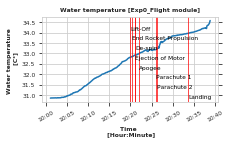

In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
sns.set_style("whitegrid")


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
plt.rcParams.update({'font.size': 7})


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.20, bottom=.35, right=0.9, top=.90)

sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]]
            
            )


for event in events_list:
    plt.axvline(x=event, color='r', ls='-', linewidth=0.7)

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=9))
y_event_locations = y_event_locations[::-1]

plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, y_event_locations[3], 'De-spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, y_event_locations[2], 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(ejection_of_motor, y_event_locations[4], 'Ejection of Motor', horizontalalignment='left', size='small', color='black')
plt.text(apogee, y_event_locations[5], 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, y_event_locations[6], 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, y_event_locations[7], 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, y_event_locations[8], 'Landing', horizontalalignment='left', size='small', color='black')

# Plot Labels
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold')
#plt.title('Oxygen Temperature over Time')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(fontsize=6, rotation=30, ha='center', va='top')
plt.yticks(fontsize=6)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')


ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp0_Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
plt.show()
fig.savefig('../output/flight_plots/Water_temperature_Exp0_Flight_module.png', dpi=1000)

Text(2019-03-11 10:20:00, 30.821, 'Lift-Off')

Text(2019-03-11 10:21:07, 30.693, 'De-spin')

Text(2019-03-11 10:20:26, 30.757, 'End Rocket Propulsion')

Text(2019-03-11 10:21:10, 30.629, 'Ejection of Motor')

Text(2019-03-11 10:22:04, 30.565, 'Apogee')

Text(2019-03-11 10:25:55, 30.501, 'Parachute 1')

Text(2019-03-11 10:26:20, 30.437, 'Parachute 2')

Text(2019-03-11 10:33:41, 30.373, 'Landing')

(array([737129.41666667, 737129.42013889, 737129.42361111, 737129.42708333,
        737129.43055556, 737129.43402778, 737129.4375    , 737129.44097222,
        737129.44444444]), <a list of 9 Text xticklabel objects>)

(array([30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. ]),
 <a list of 8 Text yticklabel objects>)

Text(0, 0.5, 'Water temperature \n [C°]')

Text(0.5, 0, 'Time  \n [Hour:Minute]')

Text(0.5, 1.0, 'Water temperature [Exp1_Flight module]')

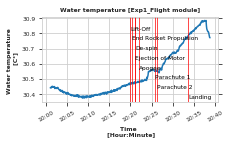

In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
sns.set_style("whitegrid")


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
plt.rcParams.update({'font.size': 7})


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.20, bottom=.35, right=0.9, top=.90)

sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]]
            
            )


for event in events_list:
    plt.axvline(x=event, color='r', ls='-', linewidth=0.7)

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[4]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=9))
y_event_locations = y_event_locations[::-1]

plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, y_event_locations[3], 'De-spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, y_event_locations[2], 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(ejection_of_motor, y_event_locations[4], 'Ejection of Motor', horizontalalignment='left', size='small', color='black')
plt.text(apogee, y_event_locations[5], 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, y_event_locations[6], 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, y_event_locations[7], 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, y_event_locations[8], 'Landing', horizontalalignment='left', size='small', color='black')

# Plot Labels
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold')
#plt.title('Oxygen Temperature over Time')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(fontsize=6, rotation=30, ha='center', va='top')
plt.yticks(fontsize=6)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')


ax.set_ylabel("Water temperature \n [C°]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Water temperature [Exp1_Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
plt.show()
fig.savefig('../output/flight_plots/Water_temperature_Exp1_Flight_module.png', dpi=1000)

Text(2019-03-11 10:20:00, 9.082125, 'Lift-Off')

Text(2019-03-11 10:21:07, 7.9243749999999995, 'De-spin')

Text(2019-03-11 10:20:26, 8.50325, 'End Rocket Propulsion')

Text(2019-03-11 10:21:10, 7.3454999999999995, 'Ejection of Motor')

Text(2019-03-11 10:22:04, 6.7666249999999994, 'Apogee')

Text(2019-03-11 10:25:55, 6.18775, 'Parachute 1')

Text(2019-03-11 10:26:20, 5.608875, 'Parachute 2')

Text(2019-03-11 10:33:41, 5.03, 'Landing')

(array([737129.41666667, 737129.42013889, 737129.42361111, 737129.42708333,
        737129.43055556, 737129.43402778, 737129.4375    , 737129.44097222,
        737129.44444444]), <a list of 9 Text xticklabel objects>)

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 7 Text yticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp1_Flight module]')

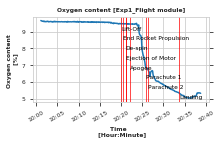

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
sns.set_style("whitegrid")


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
plt.rcParams.update({'font.size': 7})


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.20, bottom=.35, right=0.9, top=.90)

sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]]
            
            )


for event in events_list:
    plt.axvline(x=event, color='r', ls='-', linewidth=0.7)

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[5]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=9))
y_event_locations = y_event_locations[::-1]

plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, y_event_locations[3], 'De-spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, y_event_locations[2], 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(ejection_of_motor, y_event_locations[4], 'Ejection of Motor', horizontalalignment='left', size='small', color='black')
plt.text(apogee, y_event_locations[5], 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, y_event_locations[6], 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, y_event_locations[7], 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, y_event_locations[8], 'Landing', horizontalalignment='left', size='small', color='black')
# Plot Labels
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold')
#plt.title('Oxygen Temperature over Time')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(fontsize=6, rotation=30, ha='center', va='top')
plt.yticks(fontsize=6)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')


ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp1_Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
plt.show()
fig.savefig('../output/flight_plots/Oxygen_content_Exp1_Flight_module.png', dpi=1000)

In [32]:
cols_to_keep[4]

'Exp1_OxygenTemp'

Text(2019-03-11 10:20:00, 8.18675, 'Lift-Off')

Text(2019-03-11 10:21:07, 7.57625, 'De-spin')

Text(2019-03-11 10:20:26, 7.881500000000001, 'End Rocket Propulsion')

Text(2019-03-11 10:21:10, 7.271000000000001, 'Ejection of Motor')

Text(2019-03-11 10:22:04, 6.96575, 'Apogee')

Text(2019-03-11 10:25:55, 6.6605, 'Parachute 1')

Text(2019-03-11 10:26:20, 6.35525, 'Parachute 2')

Text(2019-03-11 10:33:41, 6.05, 'Landing')

(array([737129.41666667, 737129.42013889, 737129.42361111, 737129.42708333,
        737129.43055556, 737129.43402778, 737129.4375    , 737129.44097222,
        737129.44444444]), <a list of 9 Text xticklabel objects>)

(array([5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 <a list of 8 Text yticklabel objects>)

Text(0, 0.5, 'Oxygen content \n [%]')

Text(0.5, 0, 'Time  \n [Hour:Minute]')

Text(0.5, 1.0, 'Oxygen content [Exp0_Flight module]')

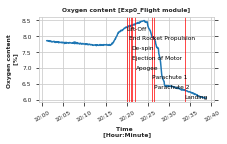

In [35]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
sns.set_style("whitegrid")


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
plt.rcParams.update({'font.size': 7})


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.20, bottom=.35, right=0.9, top=.90)

sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]]
            
            )


for event in events_list:
    plt.axvline(x=event, color='r', ls='-', linewidth=0.7)

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=9))
y_event_locations = y_event_locations[::-1]

plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, y_event_locations[3], 'De-spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, y_event_locations[2], 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(ejection_of_motor, y_event_locations[4], 'Ejection of Motor', horizontalalignment='left', size='small', color='black')
plt.text(apogee, y_event_locations[5], 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, y_event_locations[6], 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, y_event_locations[7], 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, y_event_locations[8], 'Landing', horizontalalignment='left', size='small', color='black')
# Plot Labels
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold')
#plt.title('Oxygen Temperature over Time')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(fontsize=6, rotation=30, ha='center', va='top')
plt.yticks(fontsize=6)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')


ax.set_ylabel("Oxygen content \n [%]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Oxygen content [Exp0_Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
plt.show()
fig.savefig('../output/flight_plots/Oxygen_content_Exp0_Flight_module.png', dpi=1000)

Text(2019-03-11 10:20:00, 0.00733, 'Lift-Off')

Text(2019-03-11 10:21:07, 0.00726, 'De-spin')

Text(2019-03-11 10:20:26, 0.007295, 'End Rocket Propulsion')

Text(2019-03-11 10:21:10, 0.0072250000000000005, 'Ejection of Motor')

Text(2019-03-11 10:22:04, 0.00719, 'Apogee')

Text(2019-03-11 10:25:55, 0.007155, 'Parachute 1')

Text(2019-03-11 10:26:20, 0.0071200000000000005, 'Parachute 2')

Text(2019-03-11 10:33:41, 0.007085, 'Landing')

(array([737129.41666667, 737129.42013889, 737129.42361111, 737129.42708333,
        737129.43055556, 737129.43402778, 737129.4375    , 737129.44097222,
        737129.44444444]), <a list of 9 Text xticklabel objects>)

(array([0.00705, 0.0071 , 0.00715, 0.0072 , 0.00725, 0.0073 , 0.00735,
        0.0074 ]), <a list of 8 Text yticklabel objects>)

Text(0, 0.5, 'pH Value')

Text(0.5, 0, 'Time  \n [Hour:Minute]')

Text(0.5, 1.0, 'pH Value [Exp0_Flight module]')

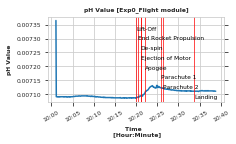

In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
sns.set_style("whitegrid")


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
plt.rcParams.update({'font.size': 7})


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.20, bottom=.35, right=0.9, top=.90)

sns.lineplot(
            x = pre_and_flight[(pre_and_flight.timeStamp > flight_start) & (pre_and_flight.Exp0_PhValue < 7.15)].timeStamp,
            y = pre_and_flight[(pre_and_flight.timeStamp > flight_start) & (pre_and_flight.Exp0_PhValue < 7.15)][cols_to_keep[3]]            
            )




for event in events_list:
    plt.axvline(x=event, color='r', ls='-', linewidth=0.7)

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[3]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=9))
y_event_locations = y_event_locations[::-1]

plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, y_event_locations[3], 'De-spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, y_event_locations[2], 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(ejection_of_motor, y_event_locations[4], 'Ejection of Motor', horizontalalignment='left', size='small', color='black')
plt.text(apogee, y_event_locations[5], 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, y_event_locations[6], 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, y_event_locations[7], 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, y_event_locations[8], 'Landing', horizontalalignment='left', size='small', color='black')

# Plot Labels
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold')
#plt.title('Oxygen Temperature over Time')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(fontsize=6, rotation=30, ha='center', va='top')
plt.yticks(fontsize=6)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')


ax.set_ylabel("pH Value", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('pH Value [Exp0_Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
plt.show()
fig.savefig('../output/flight_plots/pH_Value_Exp0_Flight_module.png', dpi=1000)

Text(2019-03-11 10:20:00, 93.8475, 'Lift-Off')

Text(2019-03-11 10:21:07, 82.4425, 'De-spin')

Text(2019-03-11 10:20:26, 88.145, 'End Rocket Propulsion')

Text(2019-03-11 10:21:10, 76.74, 'Ejection of Motor')

Text(2019-03-11 10:22:04, 71.0375, 'Apogee')

Text(2019-03-11 10:25:55, 65.335, 'Parachute 1')

Text(2019-03-11 10:26:20, 59.63249999999999, 'Parachute 2')

Text(2019-03-11 10:33:41, 53.92999999999999, 'Landing')

(array([737129.41666667, 737129.42013889, 737129.42361111, 737129.42708333,
        737129.43055556, 737129.43402778, 737129.4375    , 737129.44097222,
        737129.44444444]), <a list of 9 Text xticklabel objects>)

(array([ 50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 7 Text yticklabel objects>)

Text(0, 0.5, 'Ambient Pressure \n [hPa]')

Text(0.5, 0, 'Time  \n [Hour:Minute]')

Text(0.5, 1.0, 'Ambient Pressure [Flight module]')

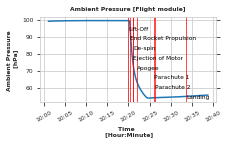

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
sns.set_style("whitegrid")


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=4)
plt.rc('axes', labelsize=6)
plt.rcParams.update({'font.size': 7})


# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.20, bottom=.35, right=0.9, top=.90)

sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]]
            
            )


for event in events_list:
    plt.axvline(x=event, color='r', ls='-', linewidth=0.7)

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[6]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=9))
y_event_locations = y_event_locations[::-1]

plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='small', color='black')
plt.text(de_spin, y_event_locations[3], 'De-spin', horizontalalignment='left', size='small', color='black')
plt.text(end_rocket_propulsion, y_event_locations[2], 'End Rocket Propulsion', horizontalalignment='left', size='small', color='black')
plt.text(ejection_of_motor, y_event_locations[4], 'Ejection of Motor', horizontalalignment='left', size='small', color='black')
plt.text(apogee, y_event_locations[5], 'Apogee', horizontalalignment='left', size='small', color='black')
plt.text(parachute_1, y_event_locations[6], 'Parachute 1', horizontalalignment='left', size='small', color='black')
plt.text(parachute_2, y_event_locations[7], 'Parachute 2', horizontalalignment='left', size='small', color='black')
plt.text(landing, y_event_locations[8], 'Landing', horizontalalignment='left', size='small', color='black')
# Plot Labels
#plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold')
#plt.xlabel("Time  \n [H:M:S]", fontweight='bold')
#plt.title('Oxygen Temperature over Time')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(fontsize=6, rotation=30, ha='center', va='top')
plt.yticks(fontsize=6)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')


ax.set_ylabel("Ambient Pressure \n [hPa]", fontsize='6', fontweight='bold')
ax.set_xlabel("Time  \n [Hour:Minute]", fontsize='6', fontweight='bold')
plt.title('Ambient Pressure [Flight module]', fontsize='6', fontweight='bold')

fig.set_size_inches(width, height)
plt.show()
fig.savefig('../output/flight_plots/Ambient_Pressure.png', dpi=1000)

In [26]:
#Water temperature [Exp0_Flight module]
#Water temperature [Exp1_Flight module]
#Oxygen content [Exp0_Flight module]
#Oxygen content [Exp1_Flight module]
#pH Value [Exp0_Flight module]
#Ambient Pressure [Flight module]

In [38]:
cols_to_keep

['timeStamp',
 'Exp0_OxygenTemp',
 'Exp0_OxygenpercentO2',
 'Exp0_PhValue',
 'Exp1_OxygenTemp',
 'Exp1_OxygenpercentO2',
 'Pressure_LateAccess']

In [28]:
pre_and_flight.to_csv('../output/pre_and_flight_plot_table.csv')

Text(2019-03-11 10:01:00, 34.579, 'Flight Start')

Text(2019-03-11 10:20:00, 29.639142857142858, 'Lift-Off')

Text(2019-03-11 10:21:07, 24.699285714285715, 'De Spin')

Text(2019-03-11 10:21:10, 19.759428571428572, 'End Rocket Propulsion')

Text(2019-03-11 10:22:04, 14.819571428571429, 'Apogee')

Text(2019-03-11 10:25:55, 9.879714285714286, 'Parachute 1')

Text(2019-03-11 10:26:20, 4.939857142857143, 'Parachute 2')

Text(2019-03-11 10:33:41, 0.0, 'Landing')

Text(0, 0.5, 'Oxygen Temperature \n [C°]')

Text(0.5, 0, 'Time  \n [H:M:S]')

Text(0.5, 1.0, 'Oxygen Temperature over Time')

(array([737129.41666667, 737129.42708333, 737129.4375    , 737129.44791667,
        737129.45833333, 737129.46875   , 737129.47916667]),
 <a list of 7 Text xticklabel objects>)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text yticklabel objects>)

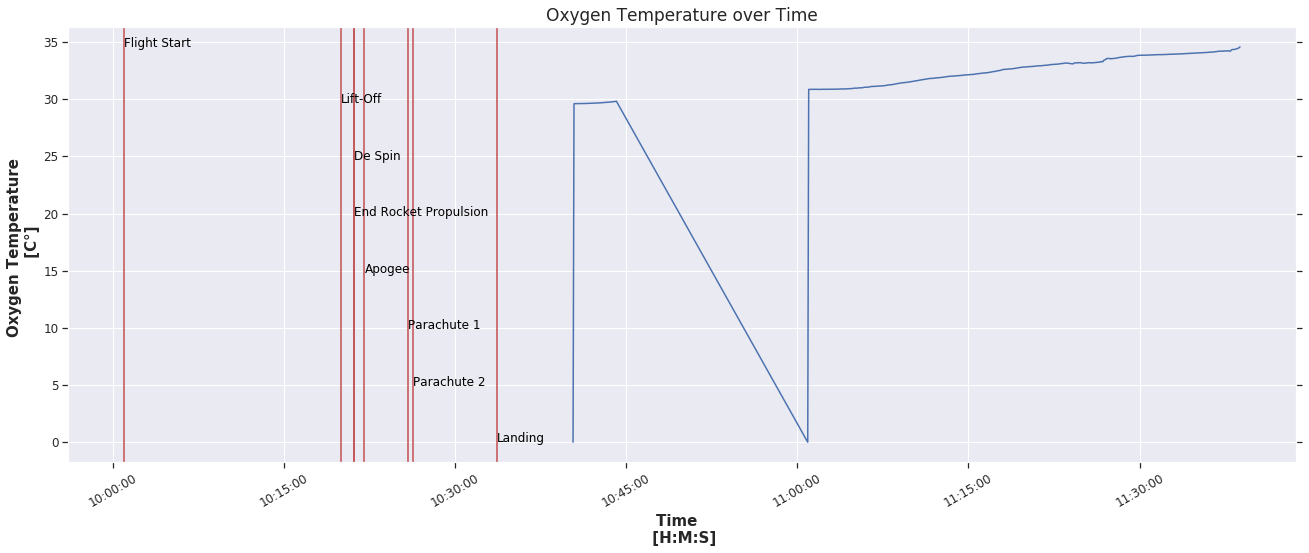

In [12]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
#ns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8})
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]]
            
            )

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[1]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=8))
y_event_locations = y_event_locations[::-1]

plt.text(flight_start,y_event_locations[0] , 'Flight Start', horizontalalignment='left', size='medium', color='black')
plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='medium', color='black')
plt.text(de_spin, y_event_locations[2], 'De Spin', horizontalalignment='left', size='medium', color='black')
plt.text(end_rocket_propulsion, y_event_locations[3], 'End Rocket Propulsion', horizontalalignment='left', size='medium', color='black')
plt.text(apogee, y_event_locations[4], 'Apogee', horizontalalignment='left', size='medium', color='black')
plt.text(parachute_1, y_event_locations[5], 'Parachute 1', horizontalalignment='left', size='medium', color='black')
plt.text(parachute_2, y_event_locations[6], 'Parachute 2', horizontalalignment='left', size='medium', color='black')
plt.text(landing, y_event_locations[7], 'Landing', horizontalalignment='left', size='medium', color='black')

# Plot Labels
plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')
# Show the minor grid lines with very faint and almost transparent grey lines
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

Text(2019-03-11 10:01:00, 11.472, 'Flight Start')

Text(2019-03-11 10:20:00, 9.833142857142857, 'Lift-Off')

Text(2019-03-11 10:21:07, 8.194285714285714, 'De Spin')

Text(2019-03-11 10:21:10, 6.555428571428571, 'End Rocket Propulsion')

Text(2019-03-11 10:22:04, 4.916571428571428, 'Apogee')

Text(2019-03-11 10:25:55, 3.2777142857142856, 'Parachute 1')

Text(2019-03-11 10:26:20, 1.6388571428571428, 'Parachute 2')

Text(2019-03-11 10:33:41, 0.0, 'Landing')

Text(0, 0.5, 'Oxygen Temperature \n [C°]')

Text(0.5, 0, 'Time  \n [H:M:S]')

Text(0.5, 1.0, 'Oxygen Temperature over Time')

(array([737129.41666667, 737129.42708333, 737129.4375    , 737129.44791667,
        737129.45833333, 737129.46875   , 737129.47916667]),
 <a list of 7 Text xticklabel objects>)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text yticklabel objects>)

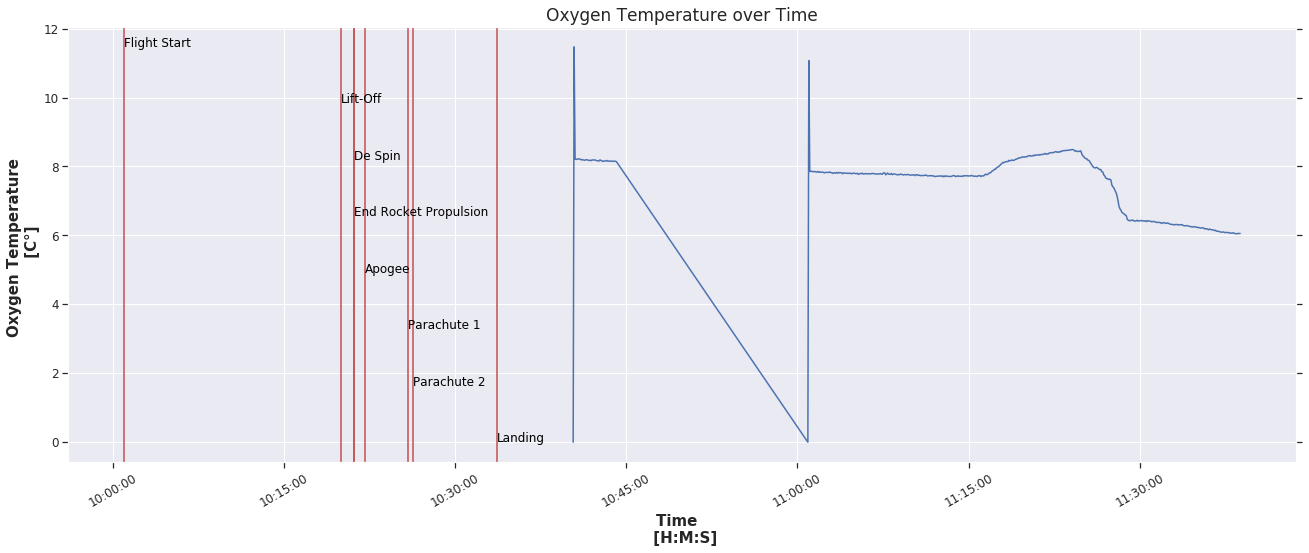

In [13]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 8)})
#ns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8})
#pre_and_flight[pre_and_flight.index >= flight_start].sort_values('timeStamp').Exp0_OxygenTemp.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
sns.lineplot(
            x = pre_and_flight[pre_and_flight.timeStamp > flight_start].timeStamp,
            y = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]]
            
            )

events_list = [flight_start, lift_off, de_spin, end_rocket_propulsion, apogee, parachute_1, parachute_2, landing]
for event in events_list:
    plt.axvline(x=event, color='r')

y_min = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].min()
y_max = pre_and_flight[pre_and_flight.timeStamp > flight_start][cols_to_keep[2]].max()
y_event_locations = np.sort(np.linspace(y_min, y_max, num=8))
y_event_locations = y_event_locations[::-1]

plt.text(flight_start,y_event_locations[0] , 'Flight Start', horizontalalignment='left', size='medium', color='black')
plt.text(lift_off, y_event_locations[1], 'Lift-Off', horizontalalignment='left', size='medium', color='black')
plt.text(de_spin, y_event_locations[2], 'De Spin', horizontalalignment='left', size='medium', color='black')
plt.text(end_rocket_propulsion, y_event_locations[3], 'End Rocket Propulsion', horizontalalignment='left', size='medium', color='black')
plt.text(apogee, y_event_locations[4], 'Apogee', horizontalalignment='left', size='medium', color='black')
plt.text(parachute_1, y_event_locations[5], 'Parachute 1', horizontalalignment='left', size='medium', color='black')
plt.text(parachute_2, y_event_locations[6], 'Parachute 2', horizontalalignment='left', size='medium', color='black')
plt.text(landing, y_event_locations[7], 'Landing', horizontalalignment='left', size='medium', color='black')

# Plot Labels
plt.ylabel("Oxygen Temperature \n [C°]",fontweight='bold', fontsize='15')
plt.xlabel("Time  \n [H:M:S]", fontweight='bold', fontsize='15')
plt.title('Oxygen Temperature over Time', fontsize='17')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(fontsize=12, rotation=30, ha='center', va='top')
plt.yticks(fontsize=12)
plt.tick_params(axis='both',bottom=True, top=False, left=True, right=True, direction='out', which='major')
# Show the minor grid lines with very faint and almost transparent grey lines
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()